In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams

# Custom Font
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
rcParams['font.size'] = 14

data = pd.read_csv('breastcancer.csv')
print(data.head())

         ID Diagnosis      3      4       5       6        7        8       9  \
0    842302         M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517         M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903         M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301         M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402         M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        10  ...     23     24      25      26      27      28      29      30  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       31  Unnamed: 31  
0

In [2]:
del data['ID']

Y=data['Diagnosis']
X=data.drop('Diagnosis', axis=1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)

# By 80-20% rule the accuracy is calculated

In [3]:
DT1 = DecisionTreeClassifier(max_depth=5)
DT1.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [4]:
y_pred = DT1.predict(X_test)

In [5]:
print("Confusion Matrix")
print("Classification Report")
print(classification_report(Y_test, y_pred),"\n")
print("Accuracy Score")
print(accuracy_score(Y_test, y_pred))

Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           B       0.94      0.93      0.94        73
           M       0.88      0.90      0.89        41

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114
 

Accuracy Score
0.9210526315789473


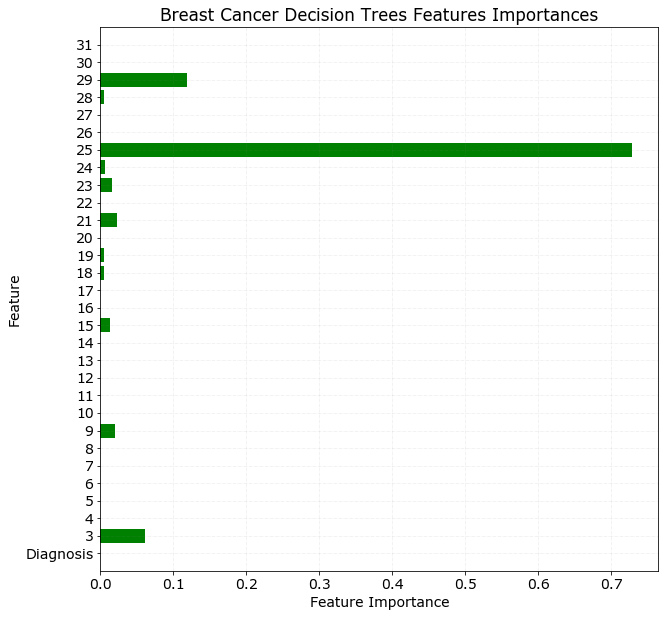

In [6]:

data_features = [x for i,x in enumerate(data.columns) if i!=30]
 
def data_feature_importances_plot(model):
    plt.figure(figsize=(10,10))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center', color='green')
    plt.yticks(np.arange(n_features), data_features)
    plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
    plt.title('Breast Cancer Decision Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
data_feature_importances_plot(DT1)
plt.show()

In [7]:
# By cross validation, maximum accuracy is calculated 
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(random_state=0)
cross_val_score(clf, X, Y, cv=5, scoring='recall_macro')
model = svm.SVC()
accuracy = cross_val_score(model, X, Y, scoring='accuracy', cv = 10)
print(accuracy)
print("Maximum accuracy of Model with Cross Validation is:",accuracy.max() * 100)

[0.89473684 0.84210526 0.89473684 0.92982456 0.92982456 0.92982456
 0.94736842 0.92982456 0.92982456 0.91071429]
Maximum accuracy of Model with Cross Validation is: 94.73684210526315


In [8]:
DT2 = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state = 1)
DT2.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [9]:
y_pred = DT2.predict(X_test)

In [10]:
print("Confusion Matrix")
print("Classification Report")
print(classification_report(Y_test, y_pred),"\n")
print("Accuracy Score")
print(accuracy_score(Y_test, y_pred))

Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           B       0.97      0.95      0.96        73
           M       0.91      0.95      0.93        41

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114
 

Accuracy Score
0.9473684210526315


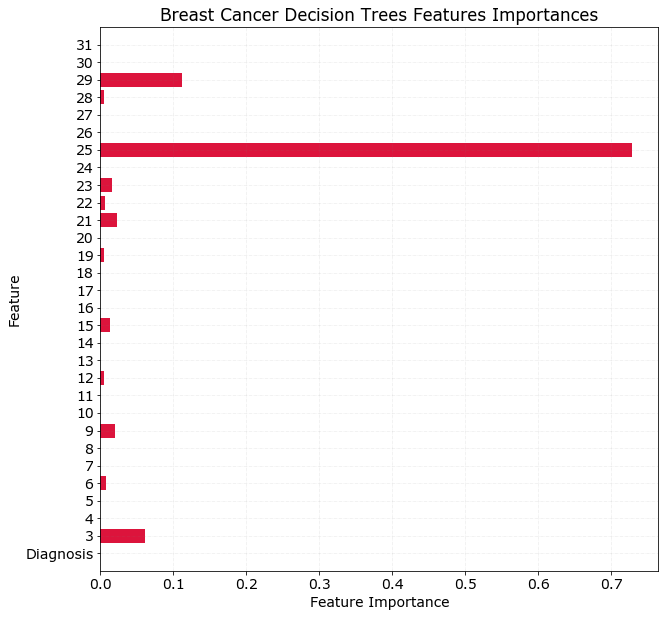

In [11]:

data_features = [x for i,x in enumerate(data.columns) if i!=30]
 
def data_feature_importances_plot(model):
    plt.figure(figsize=(10,10))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center', color='crimson')
    plt.yticks(np.arange(n_features), data_features)
    plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
    plt.title('Breast Cancer Decision Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
data_feature_importances_plot(DT2)
plt.show()

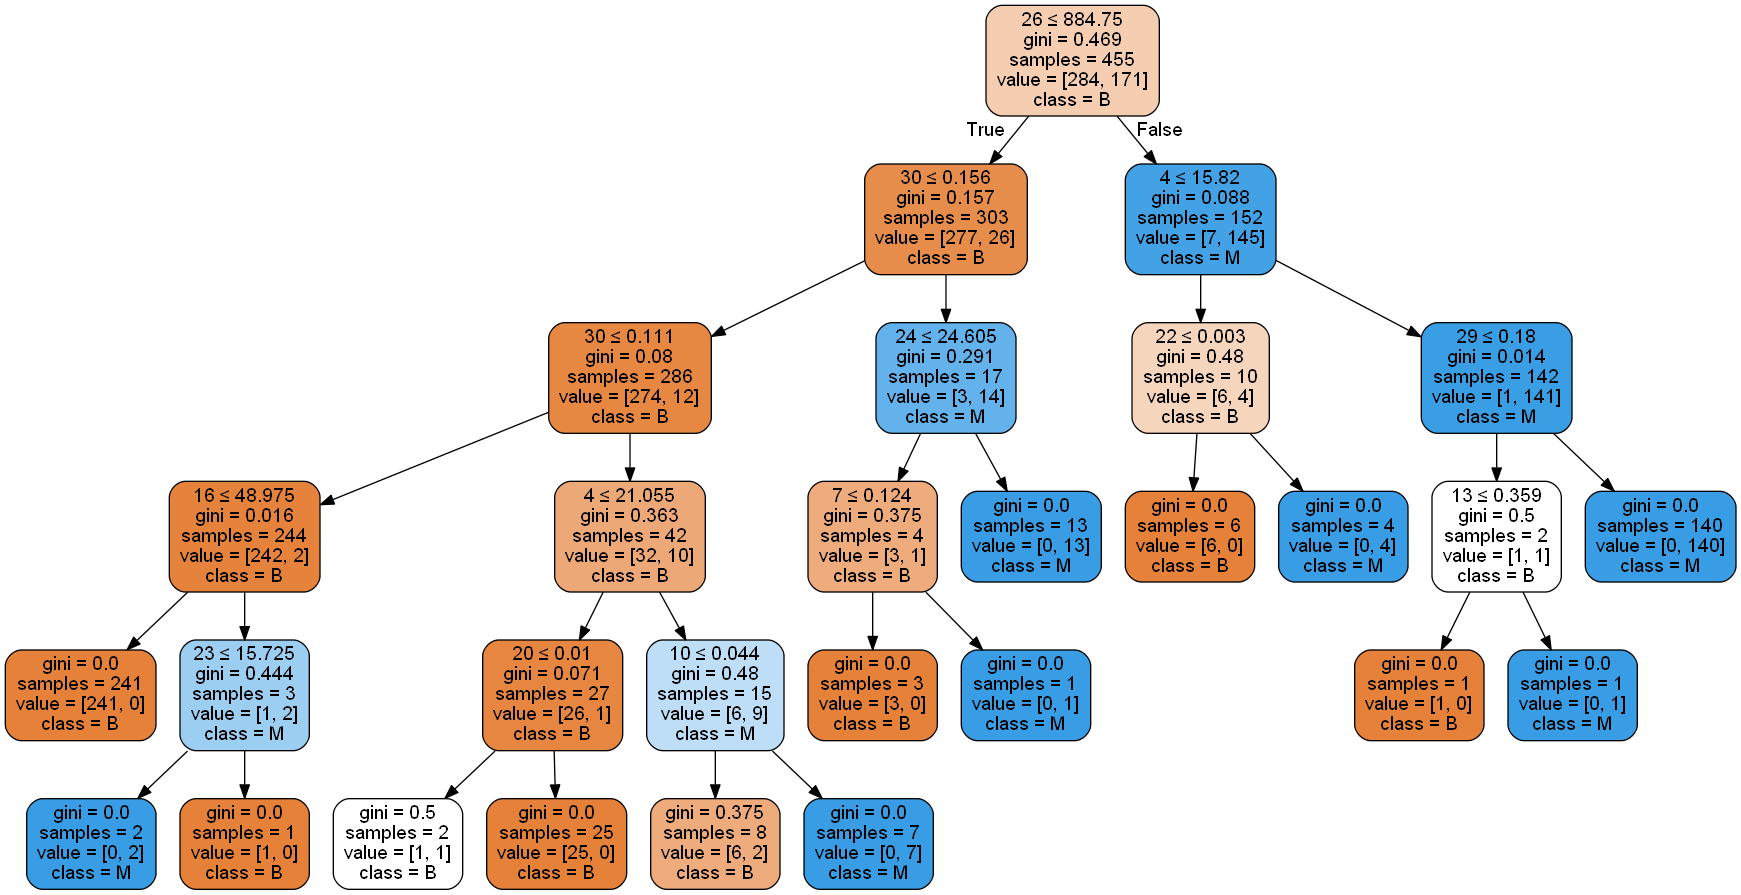

In [12]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from sklearn import tree
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(DT2, out_file = None, feature_names=X.columns, class_names=['B', 'M'], 
                filled=True, rounded=True, special_characters=True) 
dtree = pydotplus.graph_from_dot_data(dot_data)
Image(dtree.create_png())

In [13]:
DT3 = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, random_state = 1)
DT3.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [14]:
y_pred = DT3.predict(X_test)

In [15]:
print("Confusion Matrix")
print("Classification Report")
print(classification_report(Y_test, y_pred),"\n")
print("Accuracy Score")
print(accuracy_score(Y_test, y_pred))

Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           B       0.96      0.93      0.94        73
           M       0.88      0.93      0.90        41

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114
 

Accuracy Score
0.9298245614035088


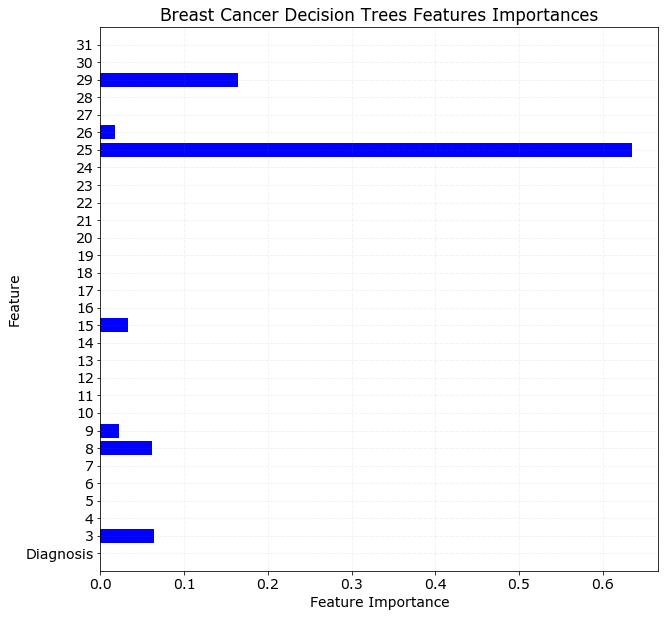

In [16]:
data_features = [x for i,x in enumerate(data.columns) if i!=30]
 
def data_feature_importances_plot(model):
    plt.figure(figsize=(10,10))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center', color='blue')
    plt.yticks(np.arange(n_features), data_features)
    plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
    plt.title('Breast Cancer Decision Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
data_feature_importances_plot(DT3)
plt.show()

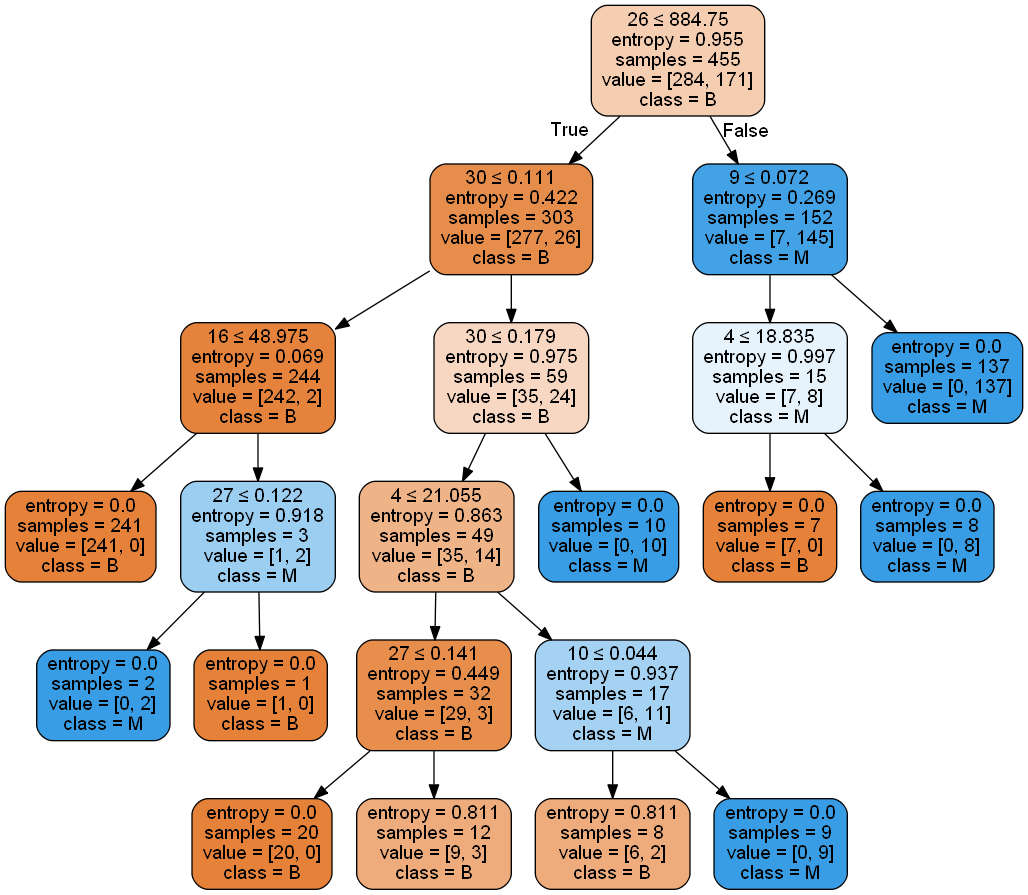

In [18]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from sklearn import tree
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(DT3, out_file = None, feature_names=X.columns, class_names=['B', 'M'], 
                filled=True, rounded=True, special_characters=True) 
dtree = pydotplus.graph_from_dot_data(dot_data)
Image(dtree.create_png())